# Credit Card Fraud Detection
---

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

### 데이터 전처리

In [58]:
credit = pd.read_csv('data/creditcard.csv')

In [59]:
df = credit
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [61]:
# df['Class'].value_counts()
# normalize 하면 percentage로 보여준다.
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

<AxesSubplot: xlabel='Class', ylabel='count'>

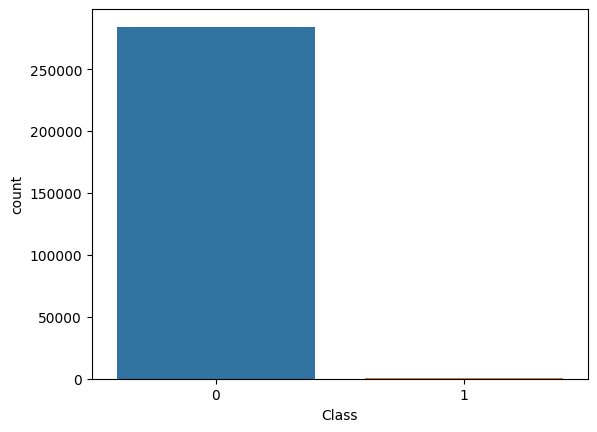

In [62]:
sns.countplot(x=df['Class'])

In [63]:
# divide
X = df.drop(['Time','Class'],axis=1)
y = df['Class']
X.shape,y.shape

((284807, 29), (284807,))

In [64]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                random_state=2022,
                                                stratify=y,
                                                 test_size=0.2
                                                )
X_train.shape,X_test.shape

((227845, 29), (56962, 29))

In [65]:
# 1-dimension
X_train['Amount'].shape

(227845,)

In [66]:
# standard 는 z표준화이다. 
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
# 2차원으로 차원을 맞춰줘요 fit_transform이 된다.
amount = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))

In [67]:
X_train['Amount'] = amount

In [93]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
180622,1.979681,-0.474765,-0.590701,0.177380,-0.240664,0.431618,-0.764432,0.208290,1.222522,-0.005470,...,-0.157936,0.205647,0.781997,0.075669,0.220107,-0.034573,-0.233996,0.032740,-0.044631,-0.167903
55978,0.964175,-1.052088,-0.017591,-0.492805,-1.165913,-1.021734,0.003150,-0.192763,-1.259083,0.778697,...,-0.133142,-0.630779,-1.947002,0.138484,0.481624,-0.177094,0.576203,-0.123411,0.033147,2.616622
262061,-0.867775,0.546923,0.245089,-0.903494,2.815045,4.141723,0.438113,1.061168,-0.596154,-0.837835,...,0.100236,0.081071,0.033550,-0.292623,0.670734,0.861808,-0.515053,0.056489,0.061340,0.601791
191188,0.786440,0.627927,0.189040,0.972690,0.604452,-0.588146,1.478182,-1.433454,0.350121,1.595765,...,0.418000,0.265309,1.655252,-0.402629,0.216880,-0.306025,1.210782,-1.207652,-0.967302,0.039877
268272,1.933397,-0.260520,-0.473325,1.512736,-0.322205,-0.080908,-0.312499,0.071308,1.361587,0.009141,...,-0.334131,-0.551011,-1.349955,0.398574,-0.531820,-0.319016,-1.074591,0.048692,-0.035306,-0.058206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80530,-0.881069,-0.781485,0.080529,-3.451610,0.872340,3.484037,-1.288272,1.374577,-2.441680,0.489493,...,-0.108762,0.127439,0.243141,-0.051868,0.986093,0.221627,-0.184973,-0.021020,0.010340,0.797677
247532,-1.191586,0.254653,1.198377,-2.408086,-0.953886,0.921060,-1.187719,1.059878,0.423681,0.291503,...,0.226456,0.137332,0.592430,-0.157397,0.078194,-0.108729,-0.287664,0.498682,0.264822,-0.279698
135761,-1.148252,0.511381,0.891353,-0.434903,0.578820,-0.184769,0.408490,-1.138738,0.805643,0.124250,...,-0.401465,0.373786,-0.689279,0.451708,-0.442165,-1.070208,-0.127763,0.027261,0.088082,-0.027984
273792,1.940035,-0.646947,-0.304405,0.281822,-1.024825,-0.710335,-0.678226,-0.014725,1.698491,-0.186593,...,-0.231831,0.182409,0.665687,0.128453,0.058553,-0.221864,0.123801,0.003305,-0.039673,0.181335


In [69]:
# !pip install imbalanced-learn

     ------------------------------------- 226.0/226.0 kB 14.4 MB/s eta 0:00:00


In [72]:
from imblearn.over_sampling import SMOTE

# smote는 upsampling 하기위해서 비율이 안맞아서 데이터 증강기법 (적은 데이터 주변에 값들과의 유사도로 비슷하게 upsampling함 )
smote = SMOTE(k_neighbors=5)
X_train_o,y_train_o = smote.fit_resample(X_train,y_train)

In [76]:
y_train_o.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

In [77]:
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

### 학습 xgboost

In [80]:
# !pip install xgboost --user

In [120]:
%%time
# 시간 측정을위해서
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=300,max_depth=4,
                   learning_rate=0.1,random_state=2022)
clf.fit(X_train_o,y_train_o)

CPU times: total: 14min 11s
Wall time: 1min 47s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=2022, ...)

In [94]:
### 테스트 data scaler
amount = scaler.transform(X_test['Amount'].values.reshape(-1,1))
X_test['Amount'] = amount
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
121002,1.157704,-0.020413,0.540405,0.526964,-0.552838,-0.372640,-0.279520,0.205396,0.136519,0.130197,...,-0.276268,-0.192598,-0.679603,0.207854,0.152210,0.004783,0.102326,-0.032086,0.002299,-0.311599
216521,-0.404421,0.366393,-1.150455,-2.277320,0.586791,1.475169,-0.272959,-0.019309,-1.290670,0.132322,...,-0.451834,0.997096,0.253282,0.138702,-0.976291,-0.306908,-0.228876,-0.160772,-0.111737,-0.301709
150118,-0.289846,1.152603,0.478215,-0.040639,-0.249299,-0.104353,-0.649508,0.510048,1.977639,-1.395155,...,-0.024020,0.189220,0.869876,0.138094,0.518423,-1.061113,-0.439537,0.200779,0.175796,-0.311523
203778,-2.030093,0.345846,0.746014,-2.343634,-0.955053,-0.419706,-0.421727,0.864594,-1.053731,-0.422690,...,0.173443,0.000094,-0.260096,-0.341505,-0.657792,0.610696,-0.334069,0.232105,-0.096292,-0.292409
29682,1.184526,-0.089540,-1.364255,-0.011424,2.198789,3.312844,-0.281292,0.748873,-0.160359,0.046857,...,0.103031,0.010714,-0.207277,-0.187719,1.007072,0.825912,-0.319210,0.005011,0.023955,-0.299453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277469,-0.773938,1.684254,-1.493845,-0.643244,0.604296,-0.596425,0.322689,0.729164,-0.295081,-1.005077,...,0.005142,-0.318788,-0.917498,0.111312,0.005145,-0.213267,0.155678,0.103442,-0.009161,-0.308465
120949,-1.883748,1.714312,0.443865,-1.395517,0.125632,1.306742,-0.769184,-2.794748,0.416504,0.551514,...,-0.308327,2.854313,-1.309944,0.316527,-1.365734,-0.013210,1.016587,0.613965,0.241380,-0.306728
92090,-0.396557,0.937644,1.227198,-0.337199,0.334340,-0.108206,0.555300,0.163111,-0.518462,-0.127601,...,0.101717,-0.236531,-0.677936,-0.128637,-0.530933,-0.131652,0.106795,0.256715,0.101271,-0.311229
92950,-3.462311,-0.096620,1.020814,-1.823767,-0.448109,1.242731,-0.343334,0.829338,1.593236,-1.390266,...,-1.059902,0.257933,1.220334,-0.237416,-0.889829,0.308296,-0.601925,-1.191032,-0.142231,-0.298772


In [96]:
y_pred = clf.predict(X_test)
my.print_score(y_test,y_pred)

accuracy: 0.9982619992275552
precision: 0.49710982658959535
recall: 0.49710982658959535


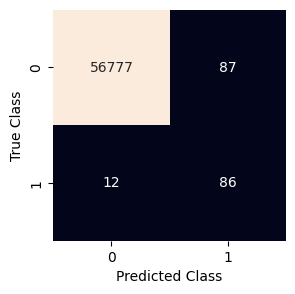

In [98]:
# 정확도는 너무 높은데 precision 이랑 recall이 낮은 이유는 데이터 자체가 0이 엄청많아서 그런것이다. 결국 데이터 부족으로 인한 결과이다.
my.plot_confusion_matrix(y_test,y_pred)


### lightGBM

In [100]:
# !pip install lightgbm --user

     ---------------------------------------- 1.0/1.0 MB 10.8 MB/s eta 0:00:00


In [103]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(learning_rate=0.1,
                    n_estimators=100,
                    max_depth=4,
                    random_state=2022)
clf.fit(X_train_o,y_train_o)

LGBMClassifier(max_depth=4, random_state=2022)

In [105]:
clf.score(X_test,y_test)

0.991871774165233

In [106]:
y_pred = clf.predict(X_test)

In [107]:
my.print_score(y_pred,y_test)

accuracy: 0.991871774165233
precision: 0.8877551020408163
recall: 0.8877551020408163


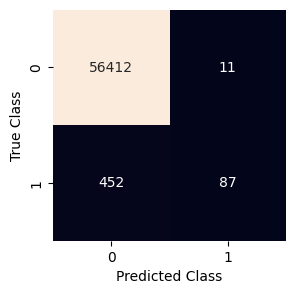

In [108]:
my.plot_confusion_matrix(y_pred,y_test)

### 랜덤 포레스트

In [113]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=2022,
                            n_estimators=100,
                            max_depth=4)
clf.fit(X_train_o,y_train_o)

RandomForestClassifier(max_depth=4, random_state=2022)

In [112]:
# not upsampling X_trian 으로만 한것
y_pred = clf.predict(X_test)
my.print_score(y_pred,y_test)

accuracy: 0.9993328885923949
precision: 0.6530612244897959
recall: 0.6530612244897959


In [114]:
# upsampling 정확도
y_pred = clf.predict(X_test)
my.print_score(y_pred,y_test)

accuracy: 0.9946806643025174
precision: 0.8877551020408163
recall: 0.8877551020408163


In [119]:
%%time
print(1)

1
CPU times: total: 0 ns
Wall time: 0 ns
